# # Goal:- Build machine learning model for Sentiment Analysis on Movie reviews.


# 1) Load dataset on to notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
train_df=pd.read_csv("train.csv")
train_df

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [3]:
movies_df=pd.read_csv("movies.csv")
movies_df

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN
143256,wonder_hermione_granger_hulk_v,Wonder Hermione Granger Hulk V,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Dwayne Clayton,NaN,NaN,NaN


In [4]:
len(movies_df["movieid"].unique())

126404

In [5]:
movies_df.drop_duplicates(subset="movieid",inplace=True)
movies_df

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,NaN,2019-01-03,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis,NaN,NaN,NaN
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN


In [6]:
train_df["movieid"].unique().shape


(16812,)

# **Merging the train data and metadata of movie . So that the required features from both data can be selected to train the model further**

In [7]:
merged_df=train_df.merge(movies_df)

print(merged_df["movieid"].nunique())
print(train_df.shape,movies_df.shape)

16812
(162758, 5) (126404, 14)


In [8]:
merged_df

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,The broad shape of the ending is predictable; ...,NEGATIVE,Frodo Baggins Norman Bates Ellen Ripley Astonish,81.0,NaN,NaN,NaN,2019-03-19,111.0,"Crime, Drama",Filipino,Sara Maggard,NaN,NaN,NaN
162754,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,A formula designed for adolescent and young ad...,POSITIVE,Elegant Starlight Labyrinth Katniss Everdeen,75.0,NaN,NaN,2018-04-13,2018-09-18,93.0,"Horror, Mystery & thriller",Korean,Frances Gagne,$111.2K,Well Go USA,NaN
162755,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,"All these years, I've kept a soft spot in my h...",NEGATIVE,Don Vito Corleone Neo Hannibal Lecter,55.0,NaN,NaN,1987-02-20,2009-04-14,96.0,Comedy,English,Claudia Bernhard,$799.4K,NaN,NaN
162756,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,Powerful documentary about the struggle of Wes...,POSITIVE,Dorothy Gale Luke Skywalker Luke Skywalker,75.0,NaN,NaN,2008-02-29,2009-07-14,89.0,Documentary,English,James Fanney,NaN,NaN,NaN


# EDA(Explorative data analysis)

# 1) summery 
**provide an overall view of the data in stastical way**

**Numerica data :- count	mean	std	min	25%	50%	75%	max**

**Text/categorical data :- count,  unique,  freq,   top**

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [10]:
# total unique entry in each columns 
train_df.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [11]:
#DataFrame containing only frequent reviewer datasset
train_df[ train_df.isFrequentReviewer]

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
5,enigma_mystique_secret,Morgan Hurst,True,"""Kajillionaire"" is a rich piece of storytellin...",POSITIVE
8,starlight_travis_bickle_tyler_durden,Michael Chavez,True,Anchored by a charming performance from Greta ...,POSITIVE
13,courageous_ellis_redding_iron_man_t-800,Gary Owen,True,"13 Assassins is reliably entertaining, but ult...",POSITIVE
22,surreal_neo_luke_skywalker,Christian Hall,True,Rumor Has It doesn't seem to realize who its m...,NEGATIVE
...,...,...,...,...,...
162744,james_bond_island_katniss_everdeen,Cheryl Turner,True,Perhaps in a second movie Aaron Cross can stan...,POSITIVE
162746,forrest_gump_fantasy_epic,Daniel Pacheco,True,Rock's wildest years - both the man and the mu...,POSITIVE
162750,forrest_gump_luke_skywalker_scarlett_o'hara,George Horton,True,Our Children isn't simply a story of a mother ...,POSITIVE
162752,incredible_norman_bates_spectacular_trinity,Cynthia Mathews,True,"Spectacular action set-pieces, clever writing ...",POSITIVE


In [12]:
# unique data value in column
print(train_df.isFrequentReviewer.unique())
print(train_df.sentiment.unique())

[False  True]
['POSITIVE' 'NEGATIVE']


In [13]:
train_df.sentiment.value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126404 entries, 0 to 143256
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               126404 non-null  object 
 1   title                 126404 non-null  object 
 2   audienceScore         63714 non-null   float64
 3   rating                11778 non-null   object 
 4   ratingContents        11778 non-null   object 
 5   releaseDateTheaters   26390 non-null   object 
 6   releaseDateStreaming  69273 non-null   object 
 7   runtimeMinutes        113910 non-null  float64
 8   genre                 116401 non-null  object 
 9   originalLanguage      114020 non-null  object 
 10  director              126404 non-null  object 
 11  boxOffice             12528 non-null   object 
 12  distributor           19549 non-null   object 
 13  soundType             13466 non-null   object 
dtypes: float64(2), object(12)
memory usage: 14.5+ MB


In [15]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
audienceScore,63714.0,55.866968,24.627308,0.0,38.0,58.0,76.0,100.0
runtimeMinutes,113910.0,93.570450,28.240486,1.0,83.0,92.0,103.0,2700.0


In [16]:
textual_col=[c for c in movies_df.columns if c not in movies_df.describe().columns ]
movies_df[textual_col].describe()

,movieid,title,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,genre,originalLanguage,director,boxOffice,distributor,soundType
count,126404,126404,11778,11778,26390,69273,116401,114020,126404,12528,19549,13466
unique,126404,126404,10,7305,11036,4595,2755,111,58057,4467,3333,500
top,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,R,['Language'],2018-09-14,2017-05-22,Drama,English,Joseph Brooks,$1.1M,Paramount Pictures,Surround
freq,1,1,6471,302,32,961,24001,74590,3564,102,823,3420


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [18]:
merged_df.describe()

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


In [19]:
textual_col=[c for c in merged_df.columns if c not in merged_df.describe().columns ]
merged_df[textual_col].describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,genre,originalLanguage,director,boxOffice,distributor,soundType
count,162758,162758,162758,156311,162758,162758,99034,99034,126924,146573,160320,159468,162758,109982,122095,77391
unique,16812,4482,2,155071,2,16812,7,4477,4226,2899,1162,91,9476,3526,1610,437
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE,Escape The Terminator Tyler Durden Astonish,R,['Language'],2019-11-01,2017-05-22,Drama,English,Joseph Brooks,$1.0M,Warner Bros. Pictures,Dolby Digital
freq,708,962,113189,29,108761,708,50331,2322,459,653,24159,132617,1404,786,7895,11733


# # Handiling null values
**2 ways to handle**

* Drop    :- if the null values is more than 25% of the entire dataset then drop
* Replace :- if null values is less than 25% of the entire dataset then replace with appropriate values( i.e with frequent, recent)

In [20]:
# code to find which features need to be drop 
#based on whether the features contain the null or empty values more than 25% for this total values
def find_drop_col(dataframe):
    drop_col=[col for col in dataframe.columns if dataframe[col].isnull().sum()>(dataframe[col].count()*1/4)]
    return drop_col


# code to find which features need to be replace 
#based on whether the features contain the null or empty values less than 25% for this total values
def find_replace_col(dataframe):
    null_data=dataframe.isnull().sum()
    null_col=[index for index in null_data.index if null_data[index]>0]
    return null_col
    


In [21]:
# Actual code to drop the features from the dataset
#based on features selected on above step    
def dropping(dataframe,col):
    return dataframe.drop(col,axis=1)



# Actual code to replace the features from the dataset
#based on features selected on above step  
def replacing(dataframe,col):
    for c in col:
        if dataframe[c].dtypes=="object":
            col_value=dataframe[c].value_counts().index[0]
            dataframe[c]=dataframe[c].fillna(col_value)
        else :
            col_value=dataframe[c].mean()
            dataframe[c]=dataframe[c].fillna(col_value)
            
    return dataframe

In [22]:
#To execute above code leading drop and replace 

drop_col=find_drop_col(merged_df)
print("drop_col :- ",drop_col)
if len(drop_col)>0:
    print("dropping the columns")
    merged_df=dropping(merged_df.copy(),drop_col)
print("dropping successfull")

drop_col :-  ['rating', 'ratingContents', 'releaseDateTheaters', 'boxOffice', 'distributor', 'soundType']
dropping the columns
dropping successfull


In [23]:
drop_col=find_drop_col(merged_df)
drop_col

[]

In [24]:
#Droping rows that contain null as value in reviewtext column
merged_df.drop(merged_df[merged_df["reviewText"].isnull()].index, inplace=True)
merged_df.isnull().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText                  0
sentiment                   0
title                       0
audienceScore           12757
releaseDateStreaming    15522
runtimeMinutes           3252
genre                    2346
originalLanguage         3143
director                    0
dtype: int64

In [25]:
#find if we want to drop  row or replace value    
replace_col=find_replace_col(merged_df)
print("replaceable columns :- ",replace_col)
if len(replace_col)>0:
    print("replacing the values inside columns")
    merged_df=replacing(merged_df.copy(),replace_col)
print("replacing successfull")


replaceable columns :-  ['audienceScore', 'releaseDateStreaming', 'runtimeMinutes', 'genre', 'originalLanguage']
replacing the values inside columns
replacing successfull


In [26]:
#since while removing the entire data from the row makes the non removed row to retain the index 
# So there is a necessary to reset the index
merged_df=merged_df.reset_index()

In [27]:
merged_df

,index,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
0,0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
1,1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
2,2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
3,3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
4,4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156306,162753,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,The broad shape of the ending is predictable; ...,NEGATIVE,Frodo Baggins Norman Bates Ellen Ripley Astonish,81.0,2019-03-19,111.0,"Crime, Drama",Filipino,Sara Maggard
156307,162754,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,A formula designed for adolescent and young ad...,POSITIVE,Elegant Starlight Labyrinth Katniss Everdeen,75.0,2018-09-18,93.0,"Horror, Mystery & thriller",Korean,Frances Gagne
156308,162755,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,"All these years, I've kept a soft spot in my h...",NEGATIVE,Don Vito Corleone Neo Hannibal Lecter,55.0,2009-04-14,96.0,Comedy,English,Claudia Bernhard
156309,162756,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,Powerful documentary about the struggle of Wes...,POSITIVE,Dorothy Gale Luke Skywalker Luke Skywalker,75.0,2009-07-14,89.0,Documentary,English,James Fanney


In [28]:
merged_df.isnull().sum()

index                   0
movieid                 0
reviewerName            0
isFrequentReviewer      0
reviewText              0
sentiment               0
title                   0
audienceScore           0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
dtype: int64

# # Visualition
 Diagramatically or non-technical view of data
 
 Ex :- bar graph , pie chat, scatter plot ..etc

<AxesSubplot: >

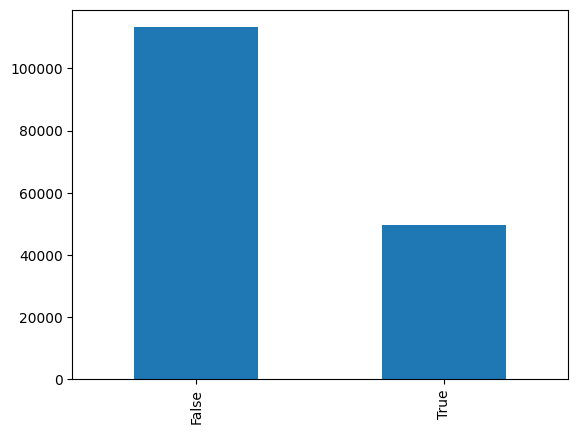

In [29]:
train_df["isFrequentReviewer"].value_counts().plot.bar()

<AxesSubplot: ylabel='isFrequentReviewer'>

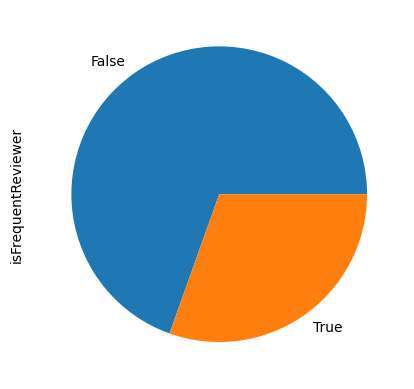

In [30]:
(train_df["isFrequentReviewer"].value_counts()/train_df.shape[0]).plot.pie()

<AxesSubplot: xlabel='isFrequentReviewer', ylabel='sentiment'>

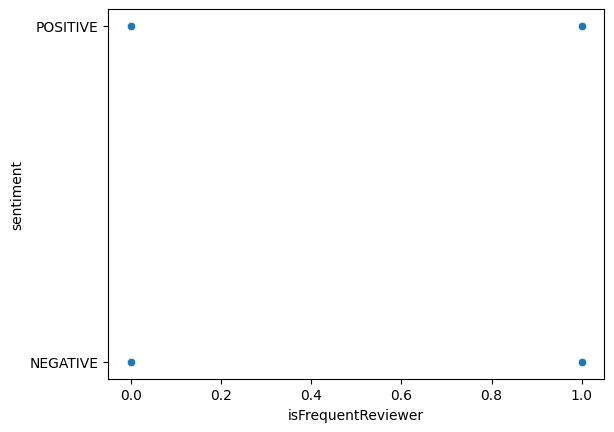

In [31]:
# checking whether ther exist relationship between frequent reviewer and sentiment predicted
import seaborn as sn
import matplotlib.pyplot as plt

sn.scatterplot(x=train_df.isFrequentReviewer,y=train_df.sentiment)

In [32]:
cross_tab = pd.crosstab(train_df['isFrequentReviewer'], train_df['sentiment'])
cross_tab

sentiment,NEGATIVE,POSITIVE
isFrequentReviewer,,
False,35760,77429
True,18237,31332


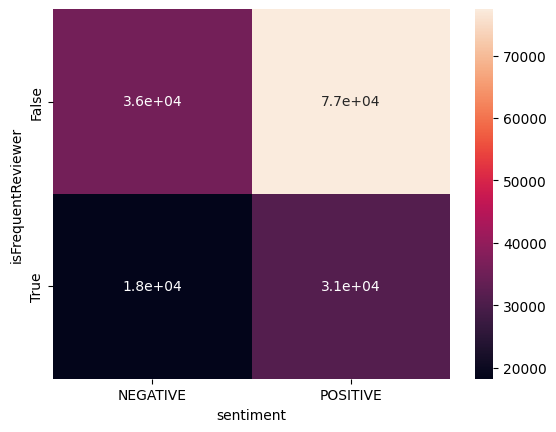

In [33]:
sn.heatmap(cross_tab, annot=True)
plt.show()

Text(0.5, 1.0, 'realtion b/w score and sentiment')

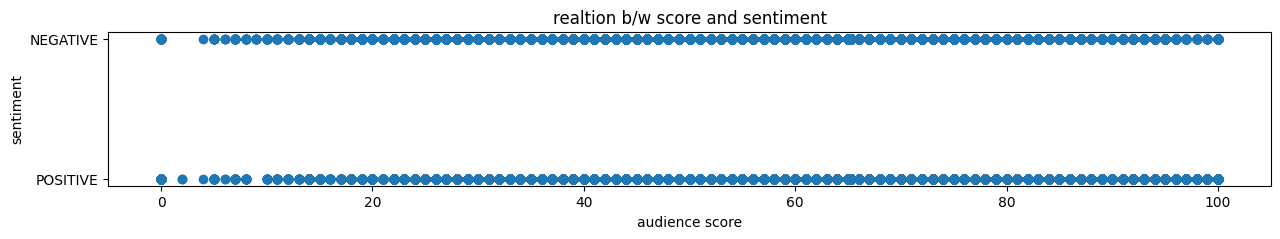

In [34]:
plt.figure(figsize=(15,2))
plt.scatter(y=merged_df["sentiment"], x=merged_df["audienceScore"])
plt.xlabel("audience score")
plt.ylabel("sentiment")
plt.title("realtion b/w score and sentiment")

Text(0.5, 1.0, 'realtion b/w runtimeMinutes and sentiment')

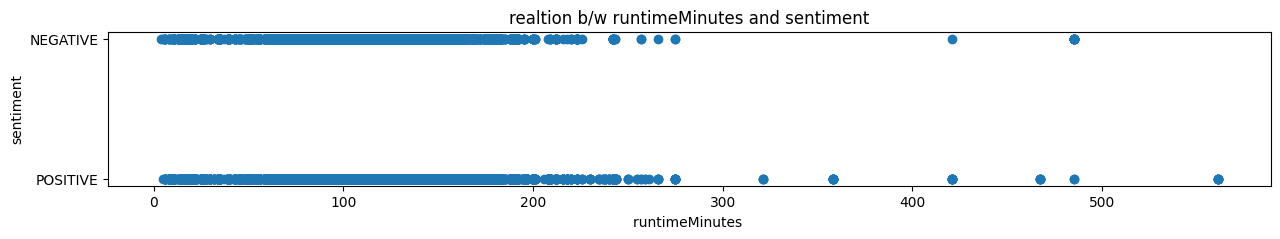

In [35]:
plt.figure(figsize=(15,2))
plt.scatter(y=merged_df["sentiment"], x=merged_df["runtimeMinutes"])
plt.xlabel("runtimeMinutes ")
plt.ylabel("sentiment")
plt.title("realtion b/w runtimeMinutes and sentiment")

# Feature Selection

In [36]:
selected_columns=['reviewText','audienceScore','runtimeMinutes', 'genre']
X_df=merged_df

target_column="sentiment"
Y_df=merged_df[target_column]

In [37]:
X_df

,index,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
0,0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
1,1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
2,2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
3,3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
4,4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156306,162753,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,The broad shape of the ending is predictable; ...,NEGATIVE,Frodo Baggins Norman Bates Ellen Ripley Astonish,81.0,2019-03-19,111.0,"Crime, Drama",Filipino,Sara Maggard
156307,162754,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,A formula designed for adolescent and young ad...,POSITIVE,Elegant Starlight Labyrinth Katniss Everdeen,75.0,2018-09-18,93.0,"Horror, Mystery & thriller",Korean,Frances Gagne
156308,162755,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,"All these years, I've kept a soft spot in my h...",NEGATIVE,Don Vito Corleone Neo Hannibal Lecter,55.0,2009-04-14,96.0,Comedy,English,Claudia Bernhard
156309,162756,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,Powerful documentary about the struggle of Wes...,POSITIVE,Dorothy Gale Luke Skywalker Luke Skywalker,75.0,2009-07-14,89.0,Documentary,English,James Fanney


# Data Preprocessing
# 1) Data Cleaning

In [38]:
import re 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [39]:
#stopping words which does not provide any addition meaning 
print("not" in ENGLISH_STOP_WORDS )
print(ENGLISH_STOP_WORDS)


True
frozenset({'never', 'our', 'why', 'we', 'such', 'keep', 'con', 'mine', 'and', 'still', 'twelve', 'within', 'sincere', 'a', 'amoungst', 'be', 'wherever', 'those', 'below', 'front', 'themselves', 'afterwards', 'get', 'thereupon', 'there', 'moreover', 'around', 'yours', 'has', 'thus', 'upon', 'indeed', 'enough', 'found', 'others', 'after', 'hereupon', 'done', 'whence', 'former', 'name', 'have', 'down', 'against', 'ten', 'anywhere', 'were', 'thru', 'its', 'must', 'cannot', 'describe', 'eleven', 'due', 'alone', 'sometime', 'without', 'see', 'thin', 'hasnt', 'where', 'you', 'please', 'sometimes', 'first', 'four', 'nowhere', 'which', 'namely', 'noone', 'because', 'also', 'hereby', 'his', 'to', 'if', 'somewhere', 'one', 'could', 'couldnt', 'an', 'becomes', 'thick', 'up', 'whereby', 'least', 'not', 'through', 'me', 'other', 'co', 'of', 'none', 'thereby', 'from', 'everything', 'find', 'bottom', 'show', 'it', 'amongst', 'whereas', 'very', 'how', 'thereafter', 'even', 'further', 'eg', 'everyo

In [40]:
#preprocessing for text data
    #-removing integer ,special character , splitting and stemming
import re    
from sklearn.preprocessing import FunctionTransformer

def stemming(text):
    text=str(text)
    stemmed_text=re.sub("[^a-zA-Z]", " " , text)
    stemmed_text=stemmed_text.lower()
    stemmed_text=stemmed_text.split()
    stemmed_text=[word for word in stemmed_text if  ((word=="not") or (word not in ENGLISH_STOP_WORDS) )]
    stemmed_text = [word for word in stemmed_text if len(word) >= 3]
    stemmed_text=" ".join(stemmed_text) 
    return stemmed_text

print(stemming("katera was 100% better than salar"))
print(stemming("riding not best "))


katera better salar
riding not best


In [41]:
# Making stemming to available in pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import re    


class CustomStemmer(BaseEstimator, TransformerMixin):

    
    def stemming(text):
        text=str(text)
        stemmed_text=re.sub("[^a-zA-Z]", " " , text)
        stemmed_text=stemmed_text.lower()
        stemmed_text=stemmed_text.split()
        stemmed_text=[word for word in stemmed_text if  ((word=="not") or (word not in ENGLISH_STOP_WORDS) )]
        stemmed_text = [word for word in stemmed_text if len(word) >= 3]
        stemmed_text=" ".join(stemmed_text)
        return pd.DataFrame({"stemmed_text": [stemmed_text]}) 


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy = X_copy.apply(stemming)
        return X_copy



# Create an instance of the custom transformer
stemmer = CustomStemmer()

# Apply the transformation
#s=X_df.copy()
#transformed_df =stemmer.transform(s["reviewText"])
#transformed_df


In [42]:
#sample_merged_df=pd.Series(merged_df["reviewText"].values)
#sample_merged_df=sample_merged_df.apply(stemming)


# # 2) Scalling of Numerical data
**The goal of scaling is to change the values of numeric columns in the dataset to use a common scale,without distorting differences in the ranges of values or losing information.**

In [43]:
from sklearn.preprocessing import MinMaxScaler
audienceScore_scalling=MinMaxScaler()
runtimeMinutes_scalling=MinMaxScaler()

# 3) vectorizering the Data
**vectorization is used to transform text into a meaningful vector (or array) of numbers.**

In [44]:
#assiging the interger values based on the ther frequency
from sklearn.feature_extraction.text import TfidfVectorizer
reviewText_vectorizer=TfidfVectorizer()


In [45]:
#vectorizer=TfidfVectorizer()
#tfidf_matrix=vectorizer.fit_transform(sample_merged_df)
#print(tfidf_matrix[:1])
#print(sample_merged_df)

# Encoding genre column ( i.e column consist of MultiLabel for each instance)
 It’s used for converting multilabel classification labels to a binary format.

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer

# Multi-label binarization
multi_label = MultiLabelBinarizer()

In [47]:
# Encode the 'sentiment column
#from sklearn.preprocessing import LabelEncoder 

#label_encoder = LabelEncoder()
#target_y = label_encoder.fit_transform(Y_df)

# Pipelining

In [48]:
import re
import string
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def process_text(text):
    if isinstance(text, str):
        #lowercasing
        text = text.lower()
        #removing special characters and punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        #remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        #remove numerical values
        text = re.sub(r'\d+', '', text)
        #tokenization
        text = re.findall(r'\b\w+\b', text)
        #negation handling
        text = ['not_' + word if text[i - 1] == 'not' else word for i, word in enumerate(text)]
        #remove stop words
        text = [word for word in text if word not in ENGLISH_STOP_WORDS]
        return text
    else:
        return []

preprocessor = Pipeline([
    ('text_processing', FunctionTransformer(lambda x: x.apply(process_text)))
])

train_df['reviewText'] = preprocessor.fit_transform(train_df['reviewText'])
train_df['reviewText']

0         [henry, selick, s, movie, s, coraline, fifth, ...
1         [cast, reads, like, vogue, oscar, party, guest...
2         [creed, ii, does, not_give, slightly, superior...
3         [know, youre, thinking, limitless, bradley, co...
4         [director, fernando, meirelles, tells, story, ...
                                ...                        
162753    [topnotch, thriller, genuine, surprises, great...
162754    [people, derek, zoolander, funny, likable, end...
162755    [fun, gentle, comedy, focuses, mainly, themes,...
162756       [film, rescued, strong, act, getting, torture]
162757             [peerless, exercise, stimulus, response]
Name: reviewText, Length: 162758, dtype: object

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'reviewText' is a list of preprocessed tokens
train_df['reviewText'] = train_df['reviewText'].apply(lambda tokens: ' '.join(tokens))

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['reviewText'])

# Print the TF-IDF matrix or use it for further analysis
tfidf_matrix

<162758x90532 sparse matrix of type '<class 'numpy.float64'>'
	with 1745673 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.pipeline import Pipeline

#text_pipeline=Pipeline(steps=[("stemming",stemming_Function)])

In [51]:
from sklearn.compose import ColumnTransformer
col_transformer=ColumnTransformer([("audienceScore",audienceScore_scalling,["audienceScore"]),
                                   ("runtimeMinutes",runtimeMinutes_scalling,["runtimeMinutes"])],
                                   remainder='drop' )
numerical_data=pd.DataFrame(col_transformer.fit_transform(X_df))
numerical_data.columns=["audienceScore","runtimeMinutes"]

In [52]:
numerical_data

,audienceScore,runtimeMinutes
0,0.65,0.181329
1,0.65,0.181329
2,0.65,0.181329
3,0.65,0.181329
4,0.65,0.181329
...,...,...
156306,0.81,0.192101
156307,0.75,0.159785
156308,0.55,0.165171
156309,0.75,0.152603


In [53]:
stemmed_data =stemmer.fit_transform(X_df["reviewText"])
reviewtext_data=reviewText_vectorizer.fit_transform(stemmed_data)
print(reviewtext_data[:1])


  (0, 34446)	0.293514543723501
  (0, 36776)	0.3147348951979244
  (0, 53950)	0.304553019311936
  (0, 20342)	0.39259562932013725
  (0, 11634)	0.4436892024781758
  (0, 36890)	0.1422590224871414
  (0, 49793)	0.46643615261266685
  (0, 25555)	0.3650299526003612


In [54]:
genre_data=multi_label.fit_transform(X_df["genre"])
genre_data

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [55]:
#tfidf_matrix=reviewText_vectorizer.fit_transform(X_df["reviewText"])

In [56]:
from scipy.sparse import hstack
X_df_matrix = hstack((reviewtext_data,genre_data,numerical_data))
#genre_data,numerical_data

In [57]:
#X_df_matrix = np.hstack((X_df[["genre","audienceScore","runtimeMinutes"]].toarray(),tfidf_matrix.toarray()))


# Spliting Train test dataset

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(X_df_matrix,Y_df,test_size=0.2,random_state=42)

In [59]:
y_test.isnull().sum()

0

# Model Selection and Training
# Linear regression

In [60]:
# from sklearn.linear_model import LogisticRegression
# logistic_model=LogisticRegression(max_iter=1000)

# #hyper parameter tuning
# parameters={"C":[0.1,1]}
# grid_cv=GridSearchCV(logistic_model,parameters,cv=3)
# grid_cv.fit(x_train,y_train)
# lr_model=grid_cv.best_estimator_

# lr_y_pred=lr_model.predict(x_test)
# print("successfull")

In [61]:
# from sklearn.metrics import confusion_matrix,classification_report
# print(confusion_matrix(y_test,lr_y_pred))
# print(classification_report(y_test,lr_y_pred))

In [62]:
# best_params = grid_cv.best_params_
# print("Best hyperparameters:", best_params)

# Linear SVC

In [63]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Initialize LinearSVC with explicit dual parameter
svc = LinearSVC(max_iter=10000, dual=False)

# Hyperparameter tuning
parameters = {"C": [0.1, 1, 10]}
grid_cv = GridSearchCV(svc, parameters, cv=3)
grid_cv.fit(x_train, y_train)

# Get the best model
svc_model = grid_cv.best_estimator_

# Predict on the test set
svc_y_pred = svc_model.predict(x_test)

print("successful")


successful


In [65]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,svc_y_pred))
print(classification_report(y_test,svc_y_pred))

[[ 6248  4103]
 [ 1883 19029]]
              precision    recall  f1-score   support

    NEGATIVE       0.77      0.60      0.68     10351
    POSITIVE       0.82      0.91      0.86     20912

    accuracy                           0.81     31263
   macro avg       0.80      0.76      0.77     31263
weighted avg       0.80      0.81      0.80     31263



# Naive_Bayes Model

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# naive_bayes_model = MultinomialNB()
# parameters = {
#     'alpha': [0.1, 1.0]
# }
# grid_cv=GridSearchCV(naive_bayes_model,parameters,cv=3)
# grid_cv.fit(x_train,y_train)
# nb_model=grid_cv.best_estimator_
# nb_y_pred=nb_model.predict(x_test)
# print("successfull")



successfull


In [ ]:

# print(confusion_matrix(y_test,nb_y_pred))
# print(classification_report(y_test,nb_y_pred))

[[ 5530  4821]
 [ 2646 18266]]
              precision    recall  f1-score   support

    NEGATIVE       0.68      0.53      0.60     10351
    POSITIVE       0.79      0.87      0.83     20912

    accuracy                           0.76     31263
   macro avg       0.73      0.70      0.71     31263
weighted avg       0.75      0.76      0.75     31263



In [66]:
y_test.isnull().sum()

0

# ROC and AUC curve


In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc



y_test_num = y_test.map({'NEGATIVE': 0, 'POSITIVE': 1})

#lr_y_pred_numeric = y_test.map({'NEGATIVE': 0, 'POSITIVE': 1})
#svc_y_pred_numeric = y_test.map({'NEGATIVE': 0, 'POSITIVE': 1})
#nb_y_pred_numeric = y_test.map({'NEGATIVE': 0, 'POSITIVE': 1})


#lr_model svc_model nb_model
y_test_num.isnull().sum()

0

AUC Score: 0.8761303375838593


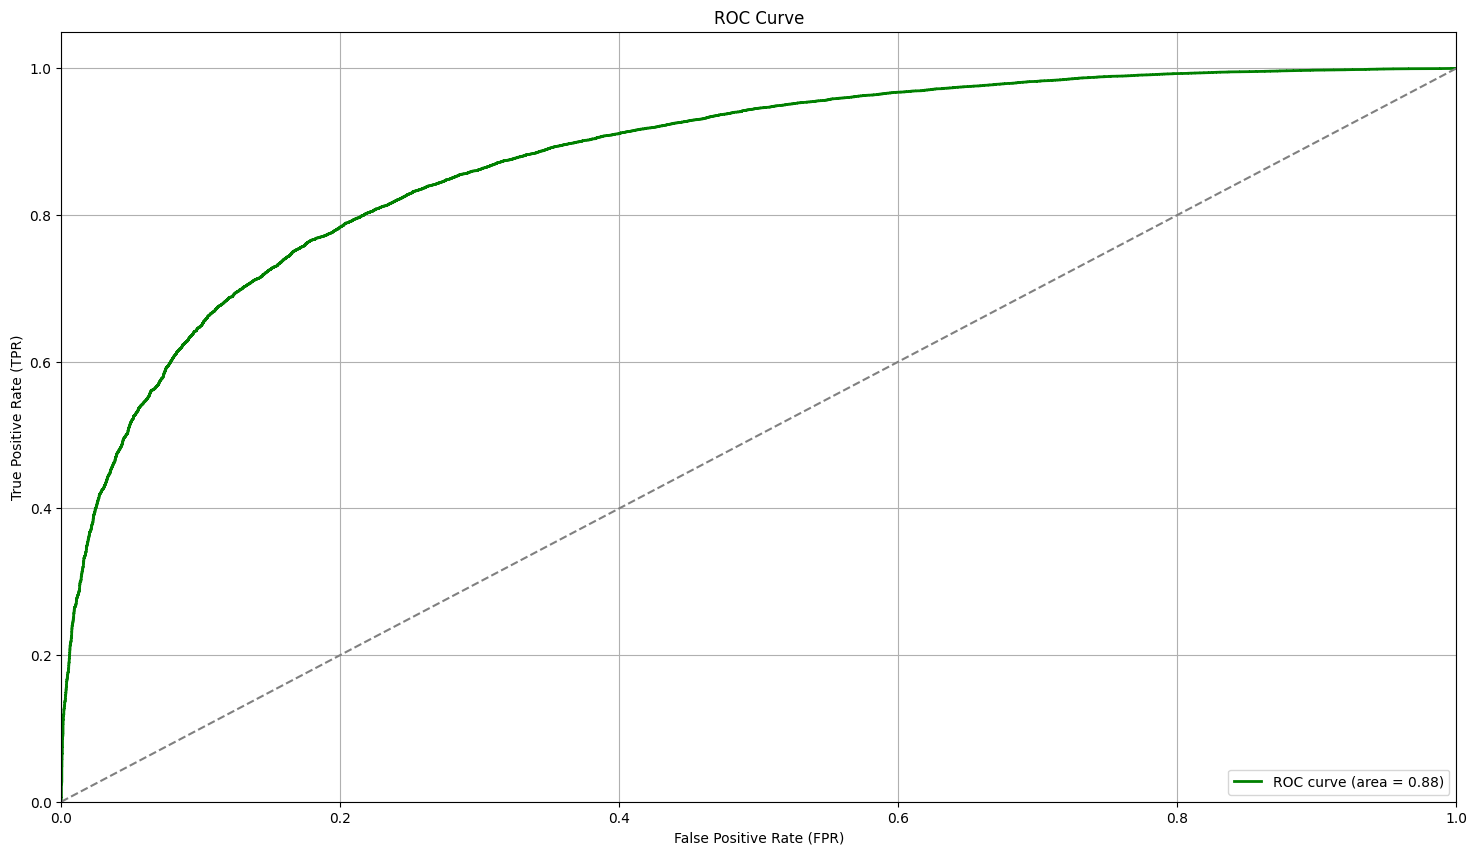

In [69]:

# Plot ROC curves and AUC 
plt.figure(figsize=(18, 10))


#For Linear Regression model
# y_score = lr_model.predict_proba(x_test)[:, 1]
# fpr, tpr, threshold = roc_curve(y_test_num, y_score)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr,tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# auc_score = roc_auc_score(y_test, y_score)
# print("AUC Score:", auc_score)



#For  Linear SVC
y_score = svc_model.decision_function(x_test)
fpr, tpr, threshold = roc_curve(y_test_num, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, color='g', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
auc_score = roc_auc_score(y_test, y_score)
print("AUC Score:", auc_score)


#For  Naive Bayes
# y_score = nb_model.predict_proba(x_test)[:, 1]
# fpr, tpr, threshold = roc_curve(y_test_num, y_score)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr,tpr, color='r', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# auc_score = roc_auc_score(y_test, y_score)
# print("AUC Score:", auc_score)


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Importing Given Test Data

In [70]:
test_df=pd.read_csv('test.csv')
test_df

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...
...,...,...,...,...
55310,celestial_radiant,Jose Mccormick,False,Ron Howard delivers an unconventional romantic...
55311,vivid_james_t._kirk,Thomas Osborne,False,As an oddball art film that openly invites you...
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,Julie Kirby,False,Nicholson wears his devilish grin from his fir...
55313,terminator_epic_rocky_balboa_mystic,Tina Sutton,True,It's hard not be entertained by two dozen of C...


In [71]:
test_df=test_df.merge(movies_df)
test_df

,movieid,reviewerName,isTopCritic,reviewText,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
1,legend_marty_mcfly_oracle,Kathleen Poole,False,Considering this is the 13th Halloween movie&#...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
2,legend_marty_mcfly_oracle,Kenneth Lamb,False,Halloween Ends is by no means the worst horror...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
3,legend_marty_mcfly_oracle,Brittany Lane,False,A concluding chapter that shares more DNA with...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
4,legend_marty_mcfly_oracle,Yolanda Thomas,False,For a film called Halloween Ends&#44; let&#821...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",2022-10-14,2022-10-14,111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55310,vivid_hannibal_lecter,Brandon Gamble,False,I love Siegel's sly paralleling of Ali's fight...,Vivid Hannibal Lecter,85.0,NaN,NaN,NaN,2014-04-22,94.0,"Documentary, Biography",English,Nyla Follmer,$57.6K,NaN,NaN
55311,rocky_balboa_darth_vader_wolverine_james_t._kirk,Traci Roberts,True,This is a failure that deserves credit mainly ...,Rocky Balboa Darth Vader Wolverine James T. Kirk,51.0,PG-13,"['Thematic Content', 'Some Disturbing Violent ...",2016-08-19,2017-03-28,98.0,"Biography, History, Drama",Hebrew,Lawrence Vanhoose,$569.4K,Focus World,NaN
55312,black_widow_frodo_baggins_tony_montana_mythical,Kari Wolf,False,John F. Donovan may revisit a lot of familiar ...,Black Widow Frodo Baggins Tony Montana Mythical,53.0,R,"['Some Sexual Material', 'Language Throughout']",2019-12-13,2019-12-13,123.0,Drama,English,Wilma Hornback,NaN,Momentum Pictures,NaN
55313,glorious_wondrous_the_terminator,Gwendolyn Guerra,False,"An unpretentious, autobiographical movie explo...",Glorious Wondrous The Terminator,30.0,R,"['Nudity', 'Language', 'Graphic Dialogue', 'St...",NaN,2010-08-03,98.0,Comedy,English,Sarah Bolivar,$6.8K,NaN,"Dolby SR, Dolby Digital"


# Handling missing values
Replacing :- replacing the empty or null value with most frequent value

In [72]:
replace_col=find_replace_col(test_df)
print("replace columns =",replace_col)
test_df=replacing(test_df,replace_col)
test_df.isnull().sum()

replace columns = ['reviewText', 'audienceScore', 'rating', 'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes', 'genre', 'originalLanguage', 'boxOffice', 'distributor', 'soundType']


movieid                 0
reviewerName            0
isTopCritic             0
reviewText              0
title                   0
audienceScore           0
rating                  0
ratingContents          0
releaseDateTheaters     0
releaseDateStreaming    0
runtimeMinutes          0
genre                   0
originalLanguage        0
director                0
boxOffice               0
distributor             0
soundType               0
dtype: int64

# **Scalling the numerical features using MinMaxScaller**

In [73]:
numerical_data=pd.DataFrame(col_transformer.transform(test_df))
numerical_data.columns=["audienceScore","runtimeMinutes"]
numerical_data

,audienceScore,runtimeMinutes
0,0.570000,0.192101
1,0.570000,0.192101
2,0.570000,0.192101
3,0.570000,0.192101
4,0.570000,0.192101
...,...,...
55310,0.850000,0.161580
55311,0.510000,0.168761
55312,0.530000,0.213645
55313,0.300000,0.168761


In [74]:
import pickle
pickle.dump(col_transformer,open('col_transformer.pkl', 'wb'))

In [75]:
pickle.dump(stemmer,open('stemmer.pkl', 'wb'))

In [76]:
pickle.dump(reviewText_vectorizer,open('vectorizer.pkl', 'wb'))

In [77]:
pickle.dump(multi_label,open('multi_label.pkl', 'wb'))

# **Cleaning and Vectorizing textual data**

In [78]:
stemmed_data =stemmer.transform(test_df["reviewText"])
stemmed_data

0        green slowly cranks dread style occasional sha...
1        considering halloween movie ways push nature e...
2        halloween ends means worst horror film year ha...
3        concluding chapter shares dna nightmare elm st...
4            film called halloween ends let pray time true
                               ...                        
55310    love siegel sly paralleling ali fight preparat...
55311    failure deserves credit mainly good intentions...
55312    john donovan revisit lot familiar territory do...
55313    unpretentious autobiographical movie exploitin...
55314    trying parse meaning mia secondary main point ...
Name: reviewText, Length: 55315, dtype: object

In [79]:
reviewtext_data=reviewText_vectorizer.transform(stemmed_data)
print(reviewtext_data[:1])

  (0, 62461)	0.2525632705350118
  (0, 56731)	0.18804505138862304
  (0, 54356)	0.2122797234261894
  (0, 51747)	0.2858716796612955
  (0, 50357)	0.3979802923082003
  (0, 44271)	0.2542501951417803
  (0, 43575)	0.2684521098090491
  (0, 38964)	0.2902043925960632
  (0, 23895)	0.27569345226836395
  (0, 20438)	0.18452743944004163
  (0, 16199)	0.29164257087641976
  (0, 12107)	0.4043762912041797
  (0, 5072)	0.1900424313433794


In [80]:
genre_data=multi_label.transform(test_df["genre"])
genre_data

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 1]])

# **Concadation of matrix and other form data(array, dataframe) into a single form using horizontal stacking**

In [81]:
from scipy.sparse import hstack
X_df_matrix = hstack((reviewtext_data,genre_data,numerical_data))
X_df_matrix

<55315x63602 sparse matrix of type '<class 'numpy.float64'>'
	with 1335304 stored elements in COOrdinate format>

# **Model Seleciton and prediction :- selecting the pre-trained best model**
* Best model is based on the Based on the AUC , Greater the AUC score better the model 

In [82]:
svc_y_pred=svc_model.predict(X_df_matrix)

In [83]:
# Create a DataFrame for submission
submission = pd.DataFrame(columns=['id', 'sentiment'])

# Assign values to the 'id' and 'sentiment' columns
submission['id'] = range(1, len(svc_y_pred) + 1)
submission['sentiment'] = svc_y_pred

# Print the submission DataFrame
print(submission)

          id sentiment
0          1  POSITIVE
1          2  POSITIVE
2          3  NEGATIVE
3          4  POSITIVE
4          5  NEGATIVE
...      ...       ...
55310  55311  POSITIVE
55311  55312  NEGATIVE
55312  55313  POSITIVE
55313  55314  NEGATIVE
55314  55315  NEGATIVE

[55315 rows x 2 columns]


# **Submitting the predicted values of corresponding test data**

In [84]:
submission.to_csv("submission.csv",index=False)

# Rough work

In [85]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'feature1': ['text1', 'text2', 'text3'],
    'target': [{'label1', 'label2'}, {'label2'}, {'label3'}]
}

df = pd.DataFrame(data)

# Multi-label binarization
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(df['target'])

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['feature1'])

# Combine binary matrix and TF-IDF matrix using hstack
combined_features = np.hstack((binary_matrix, tfidf_matrix.toarray()))

# Now 'combined_features' contains both binary and TF-IDF features
print(combined_features)


[[1. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]]


In [86]:
print(binary_matrix)

[[1 1 0]
 [0 1 0]
 [0 0 1]]


In [87]:
print(df)

  feature1            target
0    text1  {label2, label1}
1    text2          {label2}
2    text3          {label3}


In [88]:
print(tfidf_matrix)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0


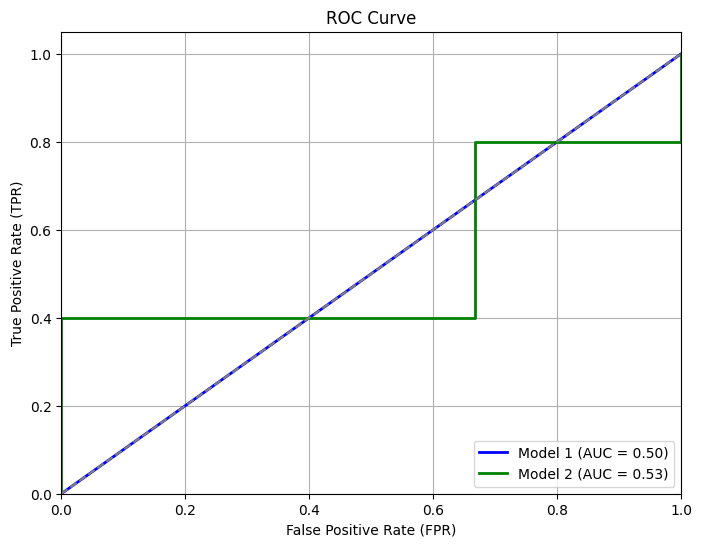

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example predicted probabilities for Model 1 and Model 2 (replace with your actual data)
y_true = np.array([1, 1, 1,1,1, 0, 0,0])  # True labels (0: negative, 1: positive)
y_pred_model1 = np.array([1, 1,1,1 ,1, 1, 1,1])  # Model 1 predictions
y_pred_model2 = np.array([0.3,1, 1,0.7, 0.6, 0.4, 0.8,0.8])  # Model 2 predictions

# Calculate ROC curve and AUC for Model 1
fpr_model1, tpr_model1, _ = roc_curve(y_true, y_pred_model1)
roc_auc_model1 = auc(fpr_model1, tpr_model1)

# Calculate ROC curve and AUC for Model 2
fpr_model2, tpr_model2, _ = roc_curve(y_true, y_pred_model2)
roc_auc_model2 = auc(fpr_model2, tpr_model2)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_model1, tpr_model1, color='b', lw=2, label='Model 1 (AUC = {:.2f})'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, color='g', lw=2, label='Model 2 (AUC = {:.2f})'.format(roc_auc_model2))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [90]:
import pickle
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc_model, f)

In [91]:
pickle.dump(movies_df.to_dict(), open('movie_dict.pkl', 'wb'))

In [92]:
movies_df


,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,NaN,2019-01-03,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis,NaN,NaN,NaN
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN


In [93]:
pickle.dump(merged_df.to_dict(), open('movie_review.pkl', 'wb'))

In [94]:
merged_df

,index,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director
0,0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
1,1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
2,2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
3,3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
4,4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,65.0,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156306,162753,frodo_baggins_norman_bates_ellen_ripley_astonish,Janice Pearson,False,The broad shape of the ending is predictable; ...,NEGATIVE,Frodo Baggins Norman Bates Ellen Ripley Astonish,81.0,2019-03-19,111.0,"Crime, Drama",Filipino,Sara Maggard
156307,162754,elegant_starlight_labyrinth_katniss_everdeen,Frank Farrell,False,A formula designed for adolescent and young ad...,POSITIVE,Elegant Starlight Labyrinth Katniss Everdeen,75.0,2018-09-18,93.0,"Horror, Mystery & thriller",Korean,Frances Gagne
156308,162755,don_vito_corleone_neo_hannibal_lecter,Juan Taylor,False,"All these years, I've kept a soft spot in my h...",NEGATIVE,Don Vito Corleone Neo Hannibal Lecter,55.0,2009-04-14,96.0,Comedy,English,Claudia Bernhard
156309,162756,dorothy_gale_luke_skywalker_luke_skywalker,Robert Cardenas,False,Powerful documentary about the struggle of Wes...,POSITIVE,Dorothy Gale Luke Skywalker Luke Skywalker,75.0,2009-07-14,89.0,Documentary,English,James Fanney


In [95]:
train_df


,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,henry selick s movie s coraline fifth stopmoti...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,cast reads like vogue oscar party guest list v...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,creed ii does not_give slightly superior rocky...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,know youre thinking limitless bradley cooper c...,POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,director fernando meirelles tells story urgenc...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,topnotch thriller genuine surprises great affl...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,people derek zoolander funny likable endearing...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,fun gentle comedy focuses mainly themes famili...,POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,film rescued strong act getting torture,NEGATIVE


In [96]:
train_df['movieid'].value_counts()

escape_the_terminator_tyler_durden_astonish    708
fantasy_forrest_gump_intrigue                  245
james_t._kirk_marty_mcfly_astonish             186
marvelous_lara_croft_luke_skywalker            140
michael_corleone_v_marty_mcfly_tony_stark      138
                                              ... 
james_bond_legend_marty_mcfly_elegant            1
myriad_aurora_edward_scissorhands                1
mystic_ferris_bueller_spectacular                1
crimson_velvet                                   1
forrest_gump_fantasy_epic                        1
Name: movieid, Length: 16812, dtype: int64

In [ ]:
pickle.dump(reviewText_vectorizer,open('scaler.pkl', 'wb'))

In [ ]:
pickle.dump(tfidf_matrix,open('vectorizer.pkl', 'wb'))

In [101]:
unique_genres = test_df["genre"].unique()
print(list(unique_genres))

['Holiday, Horror, Mystery & thriller', 'Drama, Adventure', 'Drama', 'Drama, Mystery & thriller', 'Drama, Musical', 'Mystery & thriller, Comedy', 'Drama, Lgbtq+', 'Sci-fi, Adventure, Action, Fantasy', 'Musical', 'Documentary', 'Action', 'Western', 'Comedy, Drama', 'Drama, War', 'Romance', 'Adventure', 'Horror, Mystery & thriller', 'Comedy, Action', 'Action, Comedy', 'Mystery & thriller, Drama', 'Mystery & thriller, Sci-fi, Action', 'Musical, Comedy', 'Comedy', 'Mystery & thriller', 'Drama, Romance', 'Action, Mystery & thriller, Crime, Drama', 'Mystery & thriller, War, Drama', 'Documentary, Crime, Drama', 'Action, Adventure, Fantasy, Sci-fi', 'Kids & family, Action, Adventure, Comedy, Fantasy, Animation', 'Comedy, Romance, Sci-fi', 'Musical, Romance, Comedy, Drama', 'Romance, Comedy', 'Kids & family, Comedy', 'Adventure, Romance, Action', 'Crime, Drama', 'Action, Adventure, Fantasy', 'Kids & family, Comedy, Adventure, Fantasy', 'Crime, Drama, Mystery & thriller, Action', 'Comedy, Stand-